In [2]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys

sys.path.append("../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [3]:
PD = Pile(name = "PD", seed = 10)
PB = Pile(name = "PB",seed=1)
P1 = Pile(name = "P1",seed=1)

In [4]:
#grid
sx = 0.15
sy = 0.15
sz = .15
x1 = 20
y1 = 10
z1 = -6
x0 = 0
y0 = 0
z0 = -15
nx = 133
ny = 67
nz = 62


dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

In [5]:
#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[6,6]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[6,6]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[8,8]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[6,6]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[10,10]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[10,10,3]})],alpha=0,name="vario_SIS") # input variogram
covmodel_SIS_D = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[5,5,5]})],alpha=0,name="vario_SIS") # input variogram
lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelD=[covmodel_SIS_D]


#create Lithologies 
dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"SubPile", "SubPile": PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "nearest","covmodel" : covmodelC}
dic_f_C = {"f_method" : "SIS","neig" : 10,"f_covmodel":covmodel_SIS_C}
C = Unit(name="C",order=2,ID = 2,color="blue",contact="onlap",dic_facies=dic_f_C,surface=Surface(dic_surf=dic_s_C,contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB}
dic_f_B = {"f_method":"SubPile","SubPile":PB}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

# PB
ds_B3 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B3 = {"f_method":"SIS", "neig" : 10,"f_covmodel":covmodel_SIS_D}
B3 = Unit(name = "B3",order=1,ID = 6,color="forestgreen",surface=Surface(dic_surf=ds_B3,contact="onlap"),dic_facies=df_B3)

ds_B2 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B2 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_D}
B2 = Unit(name = "B2",order=2,ID = 7,color="limegreen",surface=Surface(dic_surf=ds_B2,contact="erode"),dic_facies=df_B2)

ds_B1 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B1 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_D}
B1 = Unit(name = "B1",order=3, ID = 8,color="palegreen",surface=Surface(dic_surf=ds_B1,contact="onlap"),dic_facies=df_B1)

## Subpile
PB.add_unit([B3,B2,B1])


# PD
ds_D2 = {"int_method":"grf_ineq","covmodel":covmodelD1}
df_D2 = {"f_method":"SIS","neig" : 20,"f_covmodel":covmodel_SIS_D}
D2 = Unit(name = "D2", order=1, ID = 9,color="darkgoldenrod",surface=Surface(dic_surf=ds_D2,contact="onlap"),dic_facies=df_D2)

ds_D1 = {"int_method":"grf_ineq","covmodel":covmodelD1}
df_D1 = {"f_method":"SIS","neig" : 20,"f_covmodel":covmodel_SIS_D}
D1 = Unit(name = "D1", order=2, ID = 10,color="yellow",surface=Surface(dic_surf=ds_D1,contact="onlap"),dic_facies=df_D1)

PD.add_unit([D2, D1])

Unit D: Surface added for interpolation
Unit C: covmodel for SIS added
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added
Unit B3: covmodel for SIS added
Unit B3: Surface added for interpolation
Unit B2: covmodel for SIS added
Unit B2: Surface added for interpolation
Unit B1: covmodel for SIS added
Unit B1: Surface added for interpolation
Stratigraphic unit B3 added
Stratigraphic unit B2 added
Stratigraphic unit B1 added
Unit D2: covmodel for SIS added
Unit D2: Surface added for interpolation
Unit D1: covmodel for SIS added
Unit D1: Surface added for interpolation
Stratigraphic unit D2 added
Stratigraphic unit D1 added


In [6]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[5,5,1]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[3,3,1]})],alpha=0,name="K_vario_2")
covmodelPoro = gcm.CovModel3D(elem=[("exponential",{"w":0.005,"r":[10,10,10]})],alpha=0,name="poro_vario")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1,facies_2,facies_3,facies_5])
D.add_facies([facies_1,facies_2,facies_3,facies_5])
C.add_facies([facies_4,facies_6])

#add same facies than B
for b in PB.list_units:
    b.add_facies(B.list_facies)

#same for D
for d in PD.list_units:
    d.add_facies(D.list_facies)
    
permea = Prop("K",[facies_1,facies_2,facies_3,facies_4,facies_5,facies_6,facies_7],
                  [covmodelK2,covmodelK,covmodelK,None,covmodelK2,covmodelK,None],
                  means=[-3.5,-2,-4.5,-8,-5.5,-6.5,-10],
                  int_method = ["sgs","sgs","sgs","homogenous","sgs","sgs","homogenous"],
                  def_mean=-5)
poro = Prop("Porosity",
            [facies_1,facies_3,facies_4],
            [covmodelPoro,covmodelPoro,covmodelPoro],
             means = [0.4,0.3,0.2],
             int_method = ["sgs","sgs","sgs"],
             def_mean=0.3,
             vmin=0)

Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Gravel added to unit D
Facies GM added to unit D
Facies SM added to unit D
Facies Clay added to unit C
Facies Silt added to unit C
Facies Sand added to unit B3
Facies Gravel added to unit B3
Facies GM added to unit B3
Facies SM added to unit B3
Facies Sand added to unit B2
Facies Gravel added to unit B2
Facies GM added to unit B2
Facies SM added to unit B2
Facies Sand added to unit B1
Facies Gravel added to unit B1
Facies GM added to unit B1
Facies SM added to unit B1
Facies Sand added to unit D2
Facies Gravel added to unit D2
Facies GM added to unit D2
Facies SM added to unit D2
Facies Sand added to unit D1
Facies Gravel added to unit D1
Facies GM added to unit D1
Facies SM added to unit D1


In [7]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [8]:
#logs strati
log_strati1 = [(C,-6.01),(B3,-8),(B2,-9),(B1,-9.5),(A,-10)]
log_strati2 = [(C,-6.01),(B3,-8.5),(B2,-9.5),(A,-10.5)]
log_strati3 = [(D2,-6.01), (D1, -7), (B3,-8),(B2,-8.5),(B1,-9.5),(A,-10.5)]
log_strati4 = [(D2,-6.01), (D1, -7), (B3,-9),(B2,-10),(A,-11)]
log_strati5 = [(D2,-6.01), (D1, -7), (C,-10),(A,-12)]
log_strati6 = [(D2,-6.01), (D1, -7), (A,-9)]

# logs facies
log_facies1 = [(facies_4,-6.01),(facies_6,-6.5),(facies_4,-7),(facies_6,-7.5), # facies in unit C
               (facies_1,-8),(facies_5,-8.5),(facies_2,-9),(facies_3,-9.3),  # facies in unit B
               (facies_7,-10)]
log_facies2 = [(facies_4,-6.01),(facies_6,-7.3),(facies_4,-7.6),(facies_6,-8),
               (facies_2,-8.5),(facies_1,-8.8),(facies_2,-9),(facies_3,-9.2),(facies_1,-10),
               (facies_7,-10.5)]
log_facies3 = [(facies_1,-6.015),(facies_2,-6.8),(facies_5,-7),(facies_3,-7.3),(facies_1,-7.5),
               (facies_2,-8),(facies_1,-8.8),(facies_2,-9),(facies_3,-9.2),(facies_1,-10),
              (facies_7,-10.5)]
log_facies4 = [(facies_1,-6.01),(facies_2,-7.5),(facies_5,-7.8),(facies_3,-8),(facies_5,-8.3),(facies_1,-8.7),
               (facies_2,-9),(facies_1,-10),(facies_2,-10.5),
               (facies_7,-11)]
log_facies5 = [(facies_5,-6.01),(facies_1,-7.5),(facies_3,-7.8),(facies_2,-8),(facies_1,-8.3),(facies_2,-8.7),(facies_1,-9),(facies_5,-9.5),
               (facies_4,-10),(facies_6,-10.4),(facies_4,-11),
               (facies_7,-12)]
log_facies6 = [(facies_1,-6.01),(facies_2,-8.3),(facies_3,-8.5),(facies_2,-8.7),
               (facies_7,-9)]

#create boreholes
bh1 = borehole("b1",1,x=1,y=5,z=log_strati1[0][1],depth =9,log_strati=log_strati1,log_facies=log_facies1)
bh2 = borehole("b2",2,x=3,y=2,z=log_strati2[0][1],depth =8,log_strati=log_strati2,log_facies=log_facies2)
bh3 = borehole("b3",3,x=5,y=6,z=log_strati3[0][1],depth =7,log_strati=log_strati3,log_facies=log_facies3)
bh4 = borehole("b4",4,x=10,y=1,z=log_strati4[0][1],depth =8,log_strati=log_strati4,log_facies=log_facies4)
bh5 = borehole("b5",5,x=15,y=3,z=log_strati5[0][1],depth =8,log_strati=log_strati5,log_facies=log_facies5)
bh6 = borehole("b6",6,x=19,y=9,z=log_strati6[0][1],depth =6,log_strati=log_strati6,log_facies=log_facies6)

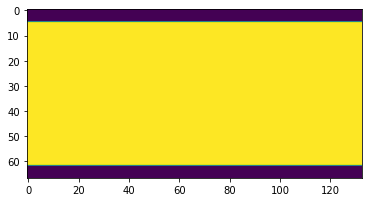

In [9]:
domain = np.ones([ny,nx],dtype=bool)
domain[: 5]= 0
domain[-5:] = 0
plt.imshow(domain)

In [10]:
T1 = Arch_table(name = "P1",seed=1)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot,polygon=domain)
T1.rem_all_bhs()
T1.add_bh([bh1,bh2,bh3,bh4,bh5,bh6])
T1.add_prop([permea])

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
boreholes removed
Borehole 1 goes below model limits, borehole 1 depth cut
Borehole 1 added
Borehole 2 added
Borehole 3 added
Borehole 4 added
Borehole 5 added
Borehole 6 added
Property K added


In [11]:
T1.order_Piles()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
Pile PD: ordering units
Stratigraphic units have been sorted according to order
Pile PB: ordering units
Stratigraphic units have been sorted according to order


In [13]:
T1.hierarchy_relations()

hierarchical relations set


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
T1.plot_bhs()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [16]:
# s=np.ones([1, 4, ny, nx])
# s[:, 0]*=0
# s[:, 1, :]*=np.linspace(-5, -12, nx)  # C
# s[:, 2, :]*=np.linspace(-12, -6, nx)  # B
# s[:, 3] = -14

# sb=np.ones([1, 3, ny, nx])
# sb[:, 0]*=-6
# sb[:, 1]*=np.linspace(-7, -16, nx) 
# sb[:, 2]*=-12

# sd = np.ones([1, 2, ny, nx])
# sd[:, 0]*=-6
# sd[:, 1]*=-7.2
# surfaces={"P1":s, "PB":sb, "PD":sd}

In [17]:
# T1.define_domains(surfaces)

In [18]:
# T1.plot_units()

In [19]:
T1.process_bhs()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Pile PD: ordering units
Stratigraphic units have been sorted according to order
Pile PB: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
First altitude in log facies of bh 3 is not set at the top of the borehole, altitude changed
Processing ended successfully


In [20]:
T1.compute_surf(1)

########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.008011579513549805 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.044851064682006836 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.07081031799316406 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 1.2757325172424316 s
##########################

########## PILE PD ##########
Pile PD: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT D1
D1: time elapsed for computing surface 0.007989883422851562 s

#### COMPUTING SURFACE OF UNIT D2
D2: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.011967897415161133 s
##########################

########## PILE PB ##########
Pile PB: ordering units
Stratigraphic units

In [21]:
T1.plot_units(h_level=1)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [22]:
p=pv.Plotter()

T1.plot_bhs(plotter=p)
T1.plot_units(iu=0, plotter=p, slicex=(0.15, 0.85), slicey=(0.2, 0.8))

p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

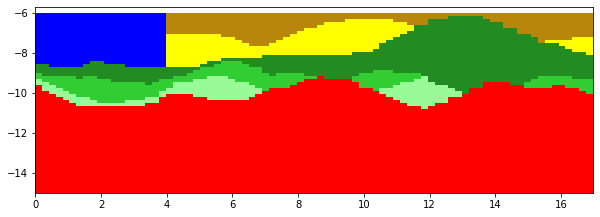

In [23]:
#cross section
p1 = [1,1]
p2 = [5,7]
p3 = [15,9]
T1.plot_cross_section([p1,p2,p3],iu=0,ratio_aspect=3)

In [24]:
T1.plot_proba(C,v_ex=1)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [25]:
T1.compute_facies(1, verbose_methods=2)


### Unit D: facies simulation with SubPile method ####
SubPile filling method, nothing happened
Time elapsed 0.0 s

### Unit C: facies simulation with SIS method ####
### Unit C - realization 0 ###
Some errors have been found 
Some facies were found inside units where they shouldn't be 

### List of errors ####
Facies basement: 1 points


Only one facies covmodels for multiples facies, adapt sill to right proportions
Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20220906 / OpenMP 7 thread(s)]
Geos-Classic run complete
Time elapsed 0.55 s

### Unit B: facies simulation with SubPile method ####
SubPile filling method, nothing happened
Time elapsed 0.0 s

### Unit A: facies simulation with homogenous method ####
### Unit A - realization 0 ###
Time elapsed 0.03 s

### Unit D2: facies simulation with SIS method ####
### Unit D2 - realization 0 ###
Only one facies covmodels for multiples facies, adapt sill to right proportions
Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 202209

In [26]:
T1.plot_facies()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [27]:
T1.plot_facies(0,0,inside_units=[D2])

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [28]:
#prop hd

ix = np.arange(0, nx*sx+0, sx)
n = len(ix)
x_hd = np.array((ix, np.ones(n)*5, np.ones(n)*-10)).T
v = np.ones(n)*-1

In [29]:
permea.x = None
permea.v = None

In [30]:
permea.add_hd(x_hd, v)

In [31]:
T1.compute_prop(1)

### 1 K property models will be modeled ###
homogenous method chosen ! Warning: Some HD can be not respected
homogenous method chosen ! Warning: Some HD can be not respected
### 1 K models done


In [32]:
T1.plot_prop("K",0, slicex=0.5,slicey=0.5,slicez=0.5)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [33]:
T1.plot_mean_prop("K", slicey = 0.5)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Cross-valid

#### make some boreholes and remove previous ones

In [34]:
np.random.seed(145)
n=40

x_positions=(np.random.random(size=n) - x0)*x1
y_positions=(np.random.random(size=n) - y0)*y1

In [35]:
l_bhs=T1.make_fake_bh(x_positions, y_positions)[0][0]

Borehole at positon (15.414780590592452, 0.5374075858244143) is outside of a simulation zone
Borehole at positon (1.3683836818569661, 0.06684945378537144) is outside of a simulation zone
Borehole at positon (5.485074132786356, 0.6773678274406503) is outside of a simulation zone
Borehole at positon (17.038022950387564, 0.1359208851639604) is outside of a simulation zone
Borehole at positon (0.5259227758039486, 0.04428559292882328) is outside of a simulation zone


In [36]:
l_bhs[3].log_strati  =[(C, -6.015), (B, -8.25), (A, -12.45)]

In [37]:
l_bhs[6].log_strati = [(D2, -6.015), (D1, -6.9), (B, -8.7), (A, -8.85)]

In [38]:
l_bhs[15].log_strati = [(D2, -6.015), (D1, -6.3), (B, -8.55), (A, -9.6)]

In [39]:
T1.rem_all_bhs()

boreholes removed


In [40]:
T1.add_bh(l_bhs)

Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Bore

In [41]:
T1.plot_bhs()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [42]:
import ArchPy.x_valid

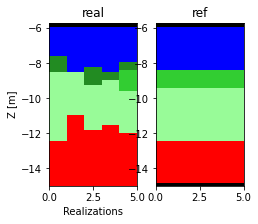

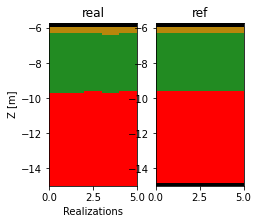

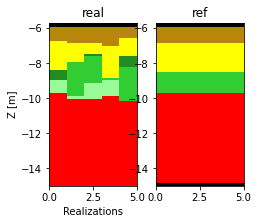

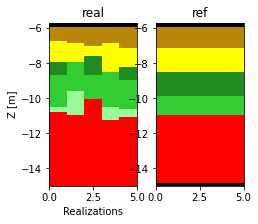

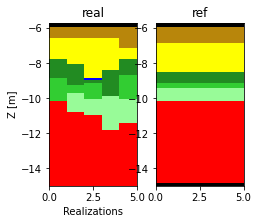

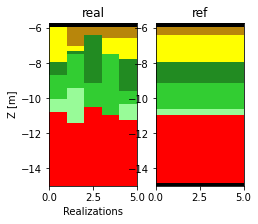

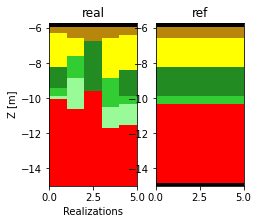

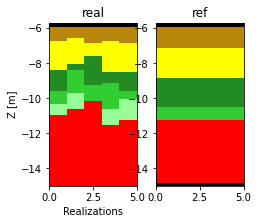

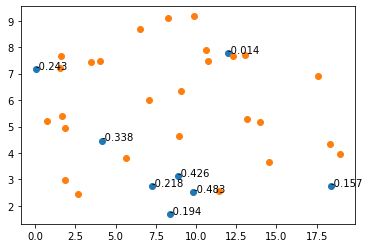

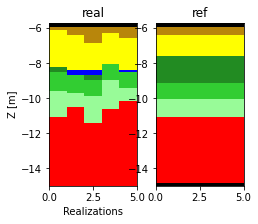

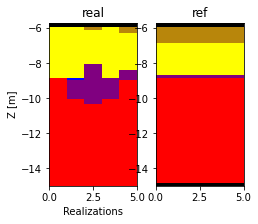

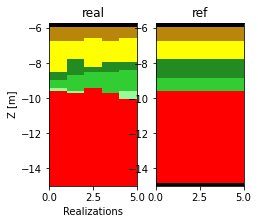

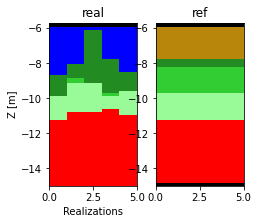

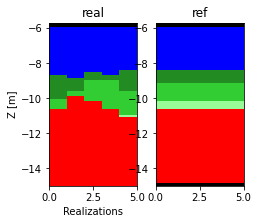

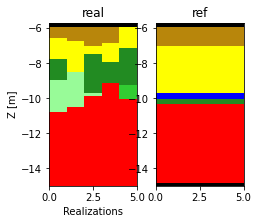

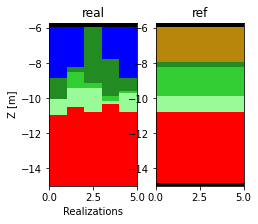

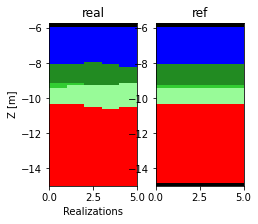

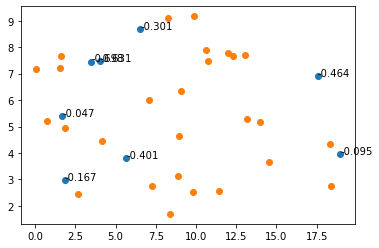

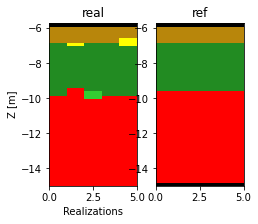

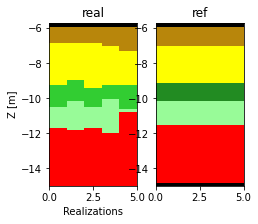

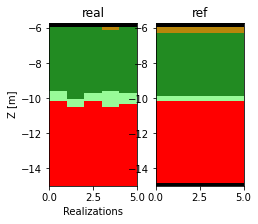

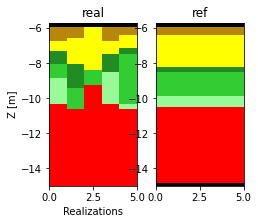

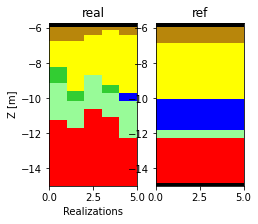

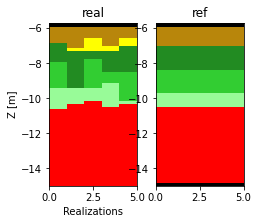

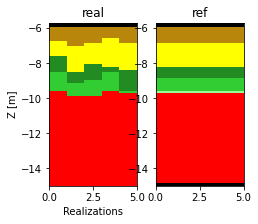

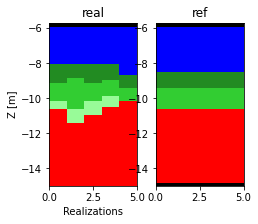

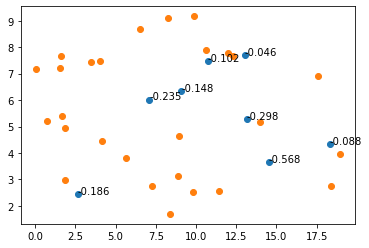

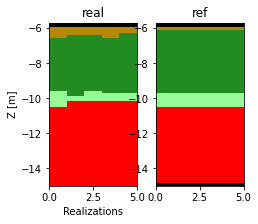

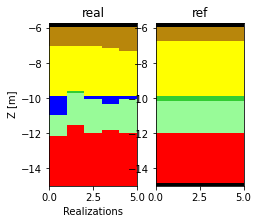

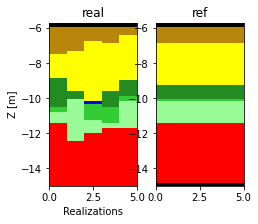

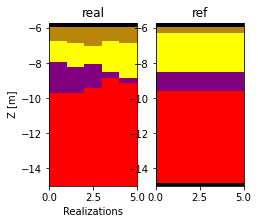

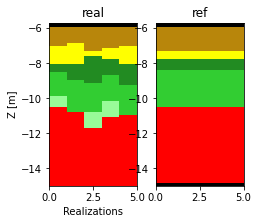

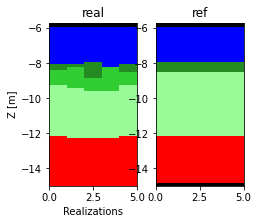

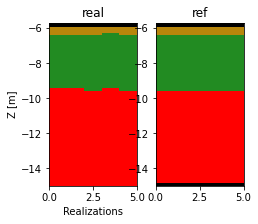

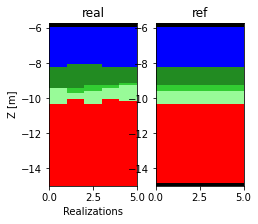

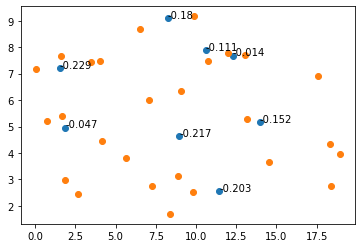

In [45]:
scores = ArchPy.x_valid.X_valid(T1, k=4, nreal_fa=0, verbose=0, seed=100)

In [46]:
scores

array([[-0.25898305,         nan],
       [-0.35050847,         nan],
       [-0.20881356,         nan],
       [-0.14423729,         nan]])

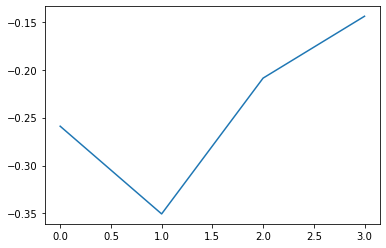

In [47]:
plt.plot(np.array(scores)[:,0])

In [48]:
len(T1.list_bhs)

35

(array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]),
 array([-0.35050847, -0.32988136, -0.30925424, -0.28862712, -0.268     ,
        -0.24737288, -0.22674576, -0.20611864, -0.18549153, -0.16486441,
        -0.14423729]),
 <BarContainer object of 10 artists>)

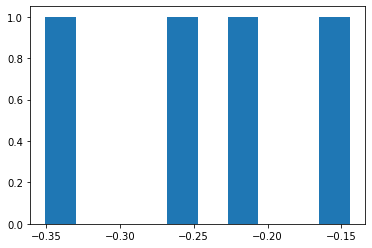

In [49]:
plt.hist(np.array(scores)[:, 0])